In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anyas-gojo-revival-aerospace-enigma/sample_submission.csv
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image233.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image106.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image27.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image109.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image56.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image2.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image185.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image115.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image47.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image245.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image146.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image40.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/test/image250.jpg
/kaggle/input/anyas-gojo-revival-aerospace-enigma/

# Image Classification using FastAI

In this image classification project, we utilized the FastAI library to build and train a deep learning model for classifying images into different categories

Reference: https://docs.fast.ai/

## 1. Importing Libraries and Handling Truncated Images

* ### Imported necessary libraries for image classification using FastAI.
* ### Handled truncated images using the `ImageFile.LOAD_TRUNCATED_IMAGES` attribute.


In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.vision.augment import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## 2. Loading and Preprocessing Data

* ### Defined the path to the training and test data.
* ### Applied data augmentation transformations using the `Resize` function and using 'squish' method.
* ### Created a `DataBlock` to load and preprocess the training data
* ### Displayed a batch of training data using `show_batch()`

In [4]:
path = Path('/kaggle/input/anyas-gojo-revival-aerospace-enigma/train')

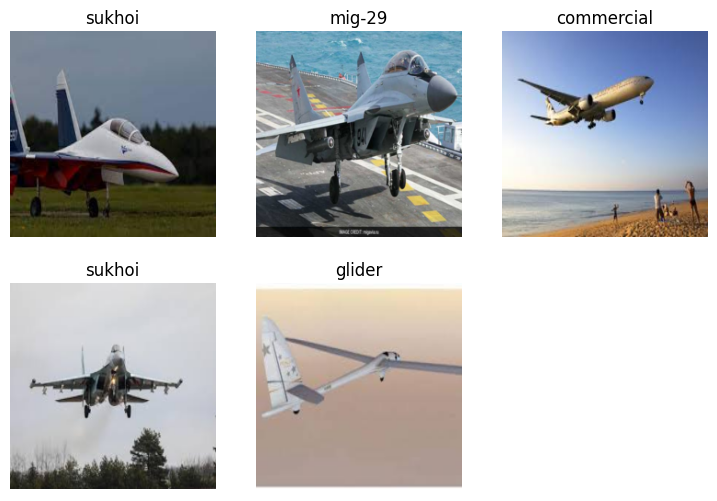

In [5]:
train = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')]
)

dataloaders = train.dataloaders(path)

# Show a batch of data
dataloaders.show_batch(max_n=5)

## 3. Model Training

* ### Created a vision learner using the `vision_learner` function with a ResNet50 architecture.
* ### Fine-tuned the model for 10 epochs using the `fine_tune` method.
* ### Monitored training progress with epoch-wise statistics.

In [6]:
learn = vision_learner(dataloaders, resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 260MB/s]


In [7]:
learn.fine_tune(epochs=10)

epoch,train_loss,valid_loss,accuracy,time
0,1.514073,0.696095,0.777778,00:19


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.434828,0.536104,0.846154,00:14
1,0.274708,0.485218,0.856838,00:14
2,0.180157,0.507294,0.863248,00:13
3,0.128407,0.561666,0.839744,00:14
4,0.090701,0.549427,0.878205,00:14
5,0.063188,0.512685,0.858974,00:14
6,0.041321,0.536255,0.863248,00:14
7,0.025602,0.522903,0.878205,00:14
8,0.018315,0.528398,0.869658,00:15
9,0.012833,0.514728,0.878205,00:14


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

## 4. Making Predictions on Test Data

* ### Loaded and the test data.
* ### Made predictions on test images using the trained model.


In [8]:
test_path = Path('/kaggle/input/anyas-gojo-revival-aerospace-enigma/test')
xtest = np.array(os.listdir(test_path))

In [9]:
ytest = []
for img in xtest:
    with learn.no_bar(), learn.no_logging():
        ytest.append(learn.predict(test_path/img)[0])
ytest = np.array(ytest)

In [10]:
image_id = np.array([im_id.strip('.jpg') for im_id in xtest])

## 5. Submission Preparation

* ### Created a DataFrame with image paths and predicted classes.
* ### Performed exploratory data analysis (EDA) on the submission DataFrame, including summary statistics and class distribution visualization.

In [11]:
submission = pd.DataFrame(data=[image_id, ytest]).T

In [12]:
submission.columns = ['image_path', 'class']

submission.head(4)

,image_path,class
0,image233,sukhoi
1,image106,helicopter
2,image27,mig-29
3,image109,helicopter


In [13]:
# Performing EDA on the submission DataFrame
# Displaying top rows
print(submission.head())

# Summary statistics
print(submission.describe())


  image_path       class
0   image233      sukhoi
1   image106  helicopter
2    image27      mig-29
3   image109  helicopter
4    image56      glider
       image_path   class
count         257     257
unique        257       5
top      image233  sukhoi
freq            1      70


In [14]:
submission["class"]

0          sukhoi
1      helicopter
2          mig-29
3      helicopter
4          glider
          ...    
252        sukhoi
253    helicopter
254        sukhoi
255        sukhoi
256    commercial
Name: class, Length: 257, dtype: object

In [15]:
submission['Image_Number'] = submission['image_path'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by the 'Image_Number' column
sorted_df = submission.sort_values(by='Image_Number')

print(sorted_df)


    image_path   class  Image_Number
91      image1  mig-29             1
5       image2  mig-29             2
111     image3  mig-29             3
172     image4  mig-29             4
210     image5  mig-29             5
..         ...     ...           ...
181   image253  sukhoi           253
191   image254  sukhoi           254
199   image255  sukhoi           255
49    image256  sukhoi           256
232   image257  sukhoi           257

[257 rows x 3 columns]


In [16]:
sorted_df.drop(['Image_Number'],axis=1,inplace=True)

In [17]:
sorted_df

,image_path,class
91,image1,mig-29
5,image2,mig-29
111,image3,mig-29
172,image4,mig-29
210,image5,mig-29
...,...,...
181,image253,sukhoi
191,image254,sukhoi
199,image255,sukhoi
49,image256,sukhoi


## 6. Generating and Saving Submission

* ### Generated a CSV file containing image paths and corresponding predicted classes.
* ### Saved the submission DataFrame to a CSV file named 'submission1.csv'.


In [18]:
sorted_df.to_csv('submission1.csv',index=False)

## Conclusion
In summary, the code demonstrates the end-to-end process of building an image classification model using FastAI, from data loading and preprocessing to model training, prediction, and submission preparation. The EDA provides a quick overview of the model's predictions and their distribution.
